In [4]:
# # 사전설치 : pip install numpy
import random
import numpy as np

# Random seed 설정
random.seed(42)
np.random.seed(42)

# 난수 생성
random_number1 = random.random()   # 0이상 1미만의 난수를 생성
numpy_array1 = np.random.rand(3)   # 0과 1미만의 난수를 3개 생성

print("첫 번째 실행:")
print("Python random:", random_number1)
print("NumPy array:", numpy_array1)

첫 번째 실행:
Python random: 0.6394267984578837
NumPy array: [0.37454012 0.95071431 0.73199394]


In [5]:
# # 사전설치 : pip install numpy
import random
import numpy as np

# Random seed 설정
random.seed(42)
np.random.seed(42)

# 난수 생성
random_number1 = random.random()   # 0이상 1미만의 난수를 생성
numpy_array1 = np.random.rand(3)   # 0과 1미만의 난수를 3개 생성

print("첫 번째 실행:")
print("Python random:", random_number1)
print("NumPy array:", numpy_array1)

첫 번째 실행:
Python random: 0.6394267984578837
NumPy array: [0.37454012 0.95071431 0.73199394]


In [6]:
# 다시 실행 (random seed 설정 X)
random_number2 = random.random()
numpy_array2 = np.random.rand(3)

print("\n두 번째 실행 (seed 설정 X):")
print("Python random:", random_number2)
print("NumPy array:", numpy_array2)


두 번째 실행 (seed 설정 X):
Python random: 0.025010755222666936
NumPy array: [0.59865848 0.15601864 0.15599452]


In [7]:
# Random seed 설정 후 다시 실행
random.seed(42)
np.random.seed(42)

# 난수 생성
random_number3 = random.random()
numpy_array3 = np.random.rand(3)

print("\n세 번째 실행 (seed 설정):")
print("Python random:", random_number3)
print("NumPy array:", numpy_array3)


세 번째 실행 (seed 설정):
Python random: 0.6394267984578837
NumPy array: [0.37454012 0.95071431 0.73199394]


In [8]:
# 선형회귀
import os
print(os.getcwd())  # 현재 작업 디렉토리 확인
print(os.listdir()) # 현재 디렉토리의 파일 목록 확인

c:\ai_files\ai_week1\dataSetStudy\ai_Regression\regression
['LogisticRegression.ipynb', 'multipleLinearRegression.ipynb', 'regression.ipynb']


In [9]:
# 사전설치 : pip install numpy scikit-learn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import random

# 재현성(난수가 동일한 순서대로 출력)을 위해 random seed 설정
random.seed(42)
np.random.seed(42)

# 데이터 준비
X = np.array([[1], [2], [3], [4], [5]])  # 독립 변수
y = np.array([2, 4, 6, 8, 10])  # 종속 변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가
predictions = model.predict(X_test)

# 결과 출력
print("학습 데이터 크기:", X_train.shape[0])
print("테스트 데이터 크기:", X_test.shape[0])
print("\n모델 계수:")
print("기울기 (slope):", model.coef_[0])
print("절편 (intercept):", model.intercept_)
print("\n테스트 세트 실제 값:", y_test)
print("테스트 세트 예측 값:", predictions)
print("\n모델 성능:")
print("R² 점수:", r2_score(y_test, predictions))
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, predictions))


학습 데이터 크기: 3
테스트 데이터 크기: 2

모델 계수:
기울기 (slope): 1.9999999999999998
절편 (intercept): 8.881784197001252e-16

테스트 세트 실제 값: [ 4 10]
테스트 세트 예측 값: [ 4. 10.]

모델 성능:
R² 점수: 1.0
평균 제곱 오차 (MSE): 0.0


In [11]:
# 어떤 건강 지표가 당뇨병 예측에 더 중요한 영향을 미치는지 파악하는 선형회귀 예
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('dataset/Advertising.csv')

# 데이터 확인
print("\n기술통계:")
print(df.describe())

# 독립변수(X)와 종속변수(y) 분리
X = df.drop('Outcome', axis=1)  # Outcome을 제외한 모든 특성
y = df['Outcome']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)


# 예측
y_pred = model.predict(X_test)

# 모델 평가
print("\n모델 성능:")
print("R² 점수:", r2_score(y_test, y_pred))
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, y_pred))
print("평균 절대 오차 (MAE):", mean_absolute_error(y_test, y_pred))

# 특성 중요도 분석
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(model.coef_)
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n특성 중요도:")
print(feature_importance)

# 시각화: 특성 중요도
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Diabetes Prediction')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# 시각화: 실제값 vs 예측값
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'dataset/Advertising.csv'

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 샘플 데이터 생성
# 공부 시간(X1)과 과외 시간(X2)에 따른 시험 점수(Y) 예측
study_hours = np.array([2, 3, 4, 5, 4, 6, 7, 8, 5, 4])  # 하루 공부 시간
tutor_hours = np.array([0, 1, 0, 2, 1, 3, 2, 3, 2, 1])  # 주간 과외 시간
test_scores = np.array([60, 70, 75, 85, 75, 90, 92, 95, 80, 75])  # 시험 점수

# 입력 데이터 형태 맞추기
X = np.column_stack((study_hours, tutor_hours))

y = test_scores

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 결과 출력
print("회귀 계수:")
print(f"공부 시간: {model.coef_[0]:.2f}")
print(f"과외 시간: {model.coef_[1]:.2f}")
print(f"절편: {model.intercept_:.2f}")

# 새로운 데이터로 예측
new_student = np.array([[6, 2]])  # 공부 6시간, 과외 2시간
prediction = model.predict(new_student)
print(f"\n예측 점수: {prediction[0]:.1f}")

# 모델 성능 평가 (R-squared)
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")

회귀 계수:
공부 시간: 4.87
과외 시간: 1.94
절편: 53.39

예측 점수: 86.5
R-squared: 0.9613


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\human-30\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\human-30\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\human-30\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HAN

회귀 계수:
X1: 1.7882
X2: 2.9284
X3: 1.5135

절편: 0.1535

R-squared 값: 0.9566
평균제곱근오차(RMSE): 0.7174


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


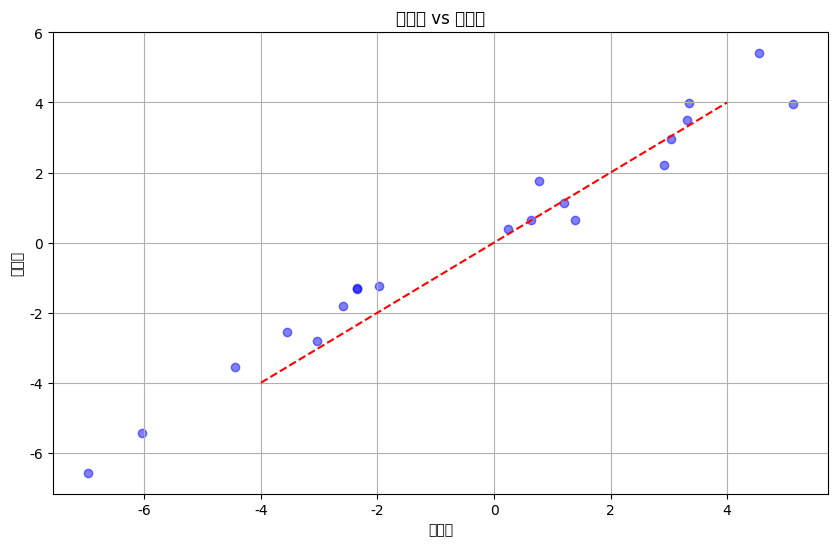


새로운 데이터 예측값: 3.2192


c:\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

# 샘플 데이터 생성
np.random.seed(42)
n_samples = 100

# 독립변수 생성
X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(0, 1, n_samples)
X3 = np.random.normal(0, 1, n_samples)

# 종속변수 생성 (Y = 2X1 + 3X2 + 1.5X3 + 오차)
Y = 2 * X1 + 3 * X2 + 1.5 * X3 + np.random.normal(0, 1, n_samples)

# 데이터프레임 생성
data = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'Y': Y
})

# 학습용과 테스트용 데이터 분리
X = data[['X1', 'X2', 'X3']]
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 출력
print("회귀 계수:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\n절편: {model.intercept_:.4f}")
print(f"\nR-squared 값: {r2_score(y_test, y_pred):.4f}")
print(f"평균제곱근오차(RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([-4, 4], [-4, 4], 'r--')  # 대각선
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs 예측값')
plt.grid(True)
plt.show()

# 새로운 데이터로 예측 예시
new_data = np.array([[0.5, 1.0, -0.5]])
prediction = model.predict(new_data)
print(f"\n새로운 데이터 예측값: {prediction[0]:.4f}")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('./dataset/LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [ ]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

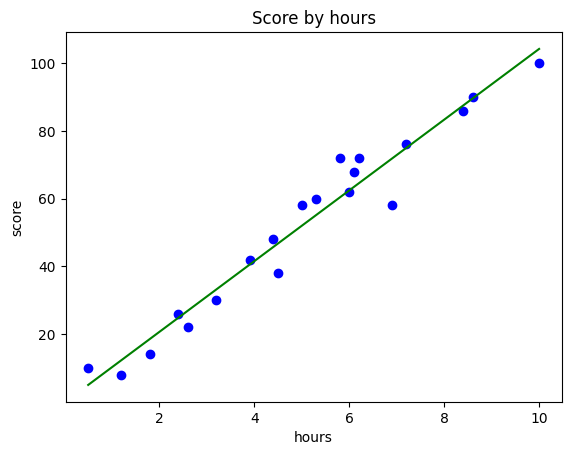

In [ ]:
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [ ]:
print('9 시간 공부 시 예상점수:', reg.predict([[9]]))

9 시간 공부 시 예상점수: [18.]


In [ ]:
reg.coef_ # 기울기(m)

array([2.])

In [ ]:
reg.intercept_ # y절편(b)

np.float64(0.0)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('./dataset/LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [ ]:
X_train, len(X_train)

(array([[ 4.5],
        [ 3.2],
        [ 5.8],
        [ 2.4],
        [ 8.6],
        [ 7.2],
        [ 6.1],
        [ 1.8],
        [ 5. ],
        [10. ],
        [ 2.6],
        [ 6. ],
        [ 4.4],
        [ 5.3],
        [ 6.2],
        [ 3.9]]),
 16)

In [ ]:
X_test, len(X_test)

(array([[0.5],
        [8.4],
        [6.9],
        [1.2]]),
 4)

In [ ]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]),
 20)

In [ ]:
y_train, len(y_train)

(array([ 38,  30,  72,  26,  90,  76,  68,  14,  58, 100,  22,  62,  48,
         60,  72,  42]),
 16)

In [ ]:
y_test, len(y_test)

(array([10, 86, 58,  8]), 4)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(X_train, y_train)


LinearRegression()

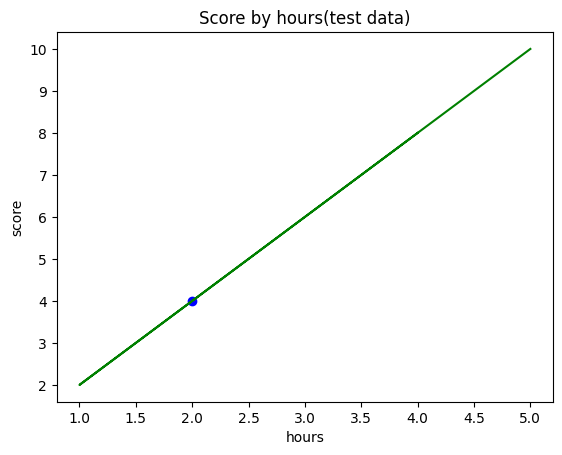

In [ ]:
plt.scatter(X_test,y_test, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by hours(test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [ ]:
reg.coef_

array([10.91083123])

In [ ]:
reg.intercept_

np.float64(-1.7249370277078384)

In [ ]:
reg.score(X_test, y_test)

0.9293669743397969

In [ ]:
## 경사하강법 예제 ##   # max_iter : 모델 학습 횟수, eta0 : 학습율(1e-4: 0.0001), versbose=1 학습결과출력
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=0)
sr.fit(X_train, y_train)

c:\ai\.venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=200, random_state=0)

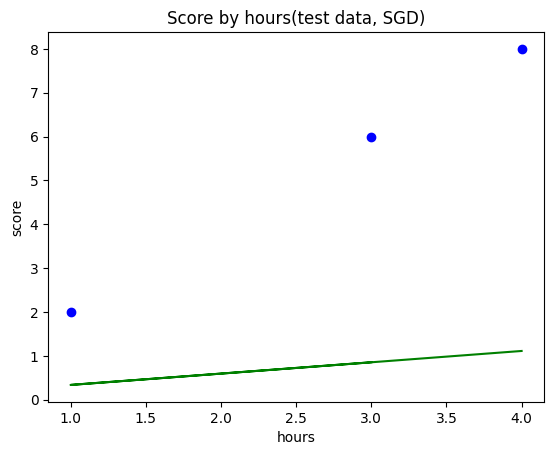

In [ ]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green')
plt.title('Score by hours(test data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [ ]:
sr.coef_, sr.intercept_

(array([8.70751062]), array([1.40586244]))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('./dataset/Advertising.csv')
# dataset

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

X = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

new_sales = np.array([[200, 50, 30]])
predictions = model.predict(new_sales)
print(f"\n예측 판매량: {predictions[0]:.1f}")

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"모델 성능 평가: {r2_squred:.4f}")

plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, model.predict(X_train), color='green')
plt.title('The Impact of Advertising on Revenue: A Linear Regression')
plt.xlabel('TV', 'Radio', 'Newspaper')
plt.ylabel('Sales')
plt.show()



예측 판매량: 21.5


c:\ai\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


NameError: name 'r2_squred' is not defined

c:\ai\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ai\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ai\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ai\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



예측 판매량: 21.5
R-squared (테스트 데이터): 0.8994
Mean Squared Error: 3.1741
회귀 방정식: Sales = 2.98 + 0.04*TV + 0.19*Radio + 0.00*Newspaper


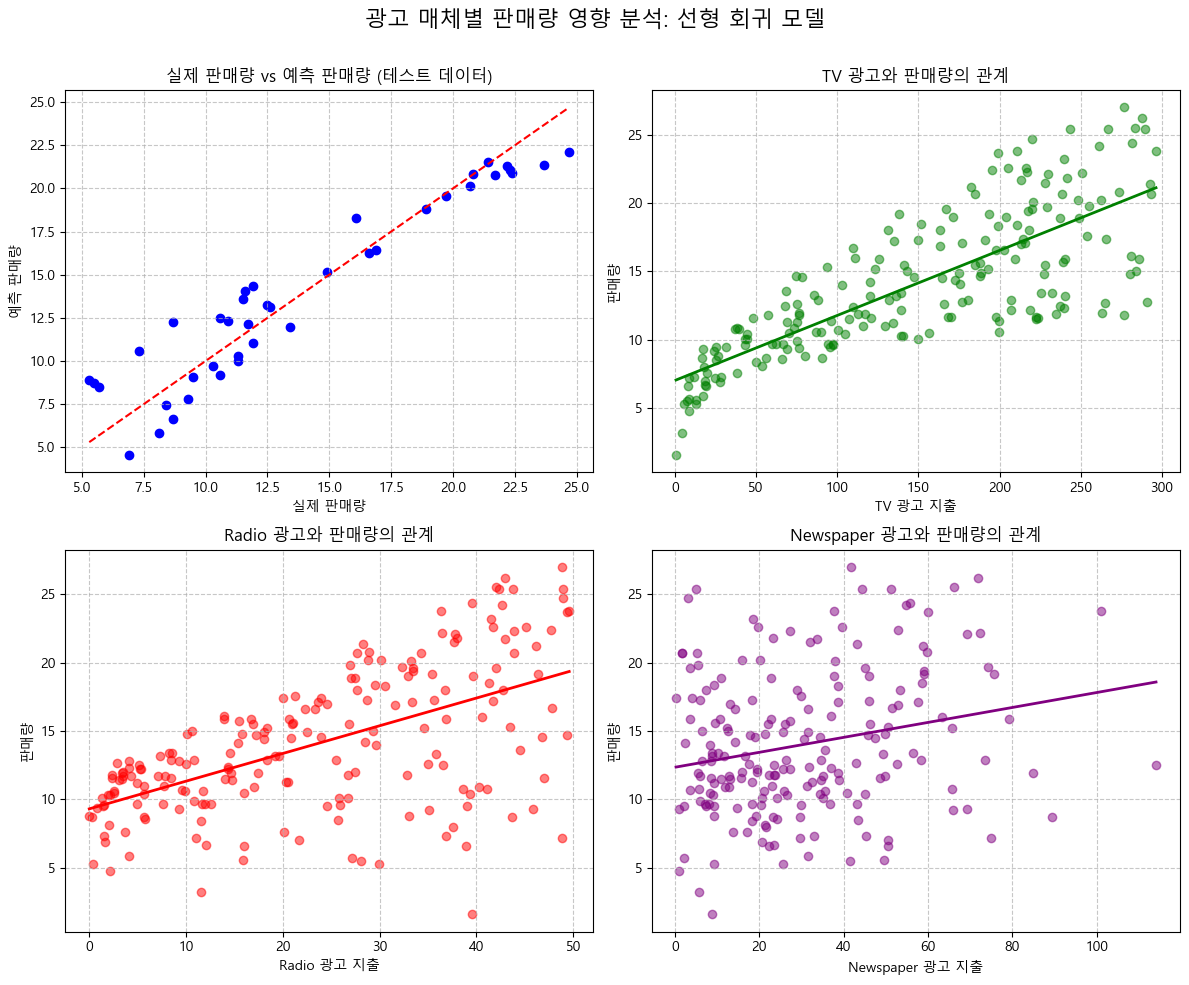

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# 데이터셋 로드
dataset = pd.read_csv('./dataset/Advertising.csv')

# 독립변수와 종속변수 설정
X = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 새로운 데이터에 대한 예측
new_sales = np.array([[200, 50, 30]])
predictions = model.predict(new_sales)
print(f"\n예측 판매량: {predictions[0]:.1f}")

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 모델 평가
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared (테스트 데이터): {r_squared:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"회귀 방정식: Sales = {model.intercept_:.2f} + {model.coef_[0]:.2f}*TV + {model.coef_[1]:.2f}*Radio + {model.coef_[2]:.2f}*Newspaper")

# 시각화 시작
plt.figure(figsize=(12, 10))

# 1. 실제 판매량 vs 예측 판매량 산점도 (테스트 데이터)
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 완벽한 예측 라인
plt.title('실제 판매량 vs 예측 판매량 (테스트 데이터)')
plt.xlabel('실제 판매량')
plt.ylabel('예측 판매량')
plt.grid(True, linestyle='--', alpha=0.7)

# 2. TV 광고와 판매량의 관계
plt.subplot(2, 2, 2)
plt.scatter(X['TV'], y, color='green', alpha=0.5)

# TV 회귀선 계산 (TV만 사용한 단순 회귀)
tv_model = LinearRegression()
tv_model.fit(X[['TV']], y)
tv_x = np.linspace(X['TV'].min(), X['TV'].max(), 100).reshape(-1, 1)
tv_y = tv_model.predict(tv_x)
plt.plot(tv_x, tv_y, color='green', linewidth=2)

plt.title('TV 광고와 판매량의 관계')
plt.xlabel('TV 광고 지출')
plt.ylabel('판매량')
plt.grid(True, linestyle='--', alpha=0.7)

# 3. Radio 광고와 판매량의 관계
plt.subplot(2, 2, 3)
plt.scatter(X['Radio'], y, color='red', alpha=0.5)

# Radio 회귀선 계산 (Radio만 사용한 단순 회귀)
radio_model = LinearRegression()
radio_model.fit(X[['Radio']], y)
radio_x = np.linspace(X['Radio'].min(), X['Radio'].max(), 100).reshape(-1, 1)
radio_y = radio_model.predict(radio_x)
plt.plot(radio_x, radio_y, color='red', linewidth=2)

plt.title('Radio 광고와 판매량의 관계')
plt.xlabel('Radio 광고 지출')
plt.ylabel('판매량')
plt.grid(True, linestyle='--', alpha=0.7)

# 4. Newspaper 광고와 판매량의 관계
plt.subplot(2, 2, 4)
plt.scatter(X['Newspaper'], y, color='purple', alpha=0.5)

# Newspaper 회귀선 계산 (Newspaper만 사용한 단순 회귀)
newspaper_model = LinearRegression()
newspaper_model.fit(X[['Newspaper']], y)
newspaper_x = np.linspace(X['Newspaper'].min(), X['Newspaper'].max(), 100).reshape(-1, 1)
newspaper_y = newspaper_model.predict(newspaper_x)
plt.plot(newspaper_x, newspaper_y, color='purple', linewidth=2)

plt.title('Newspaper 광고와 판매량의 관계')
plt.xlabel('Newspaper 광고 지출')
plt.ylabel('판매량')
plt.grid(True, linestyle='--', alpha=0.7)

plt.suptitle('광고 매체별 판매량 영향 분석: 선형 회귀 모델', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

c:\ai\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ai\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ai\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ai\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


예산 조합 1 (TV=200, Radio=50, Newspaper=30) → 예측 판매량: 21.47
예산 조합 2 (TV=150, Radio=30, Newspaper=40) → 예측 판매량: 15.47
예산 조합 3 (TV=300, Radio=70, Newspaper=20) → 예측 판매량: 29.70


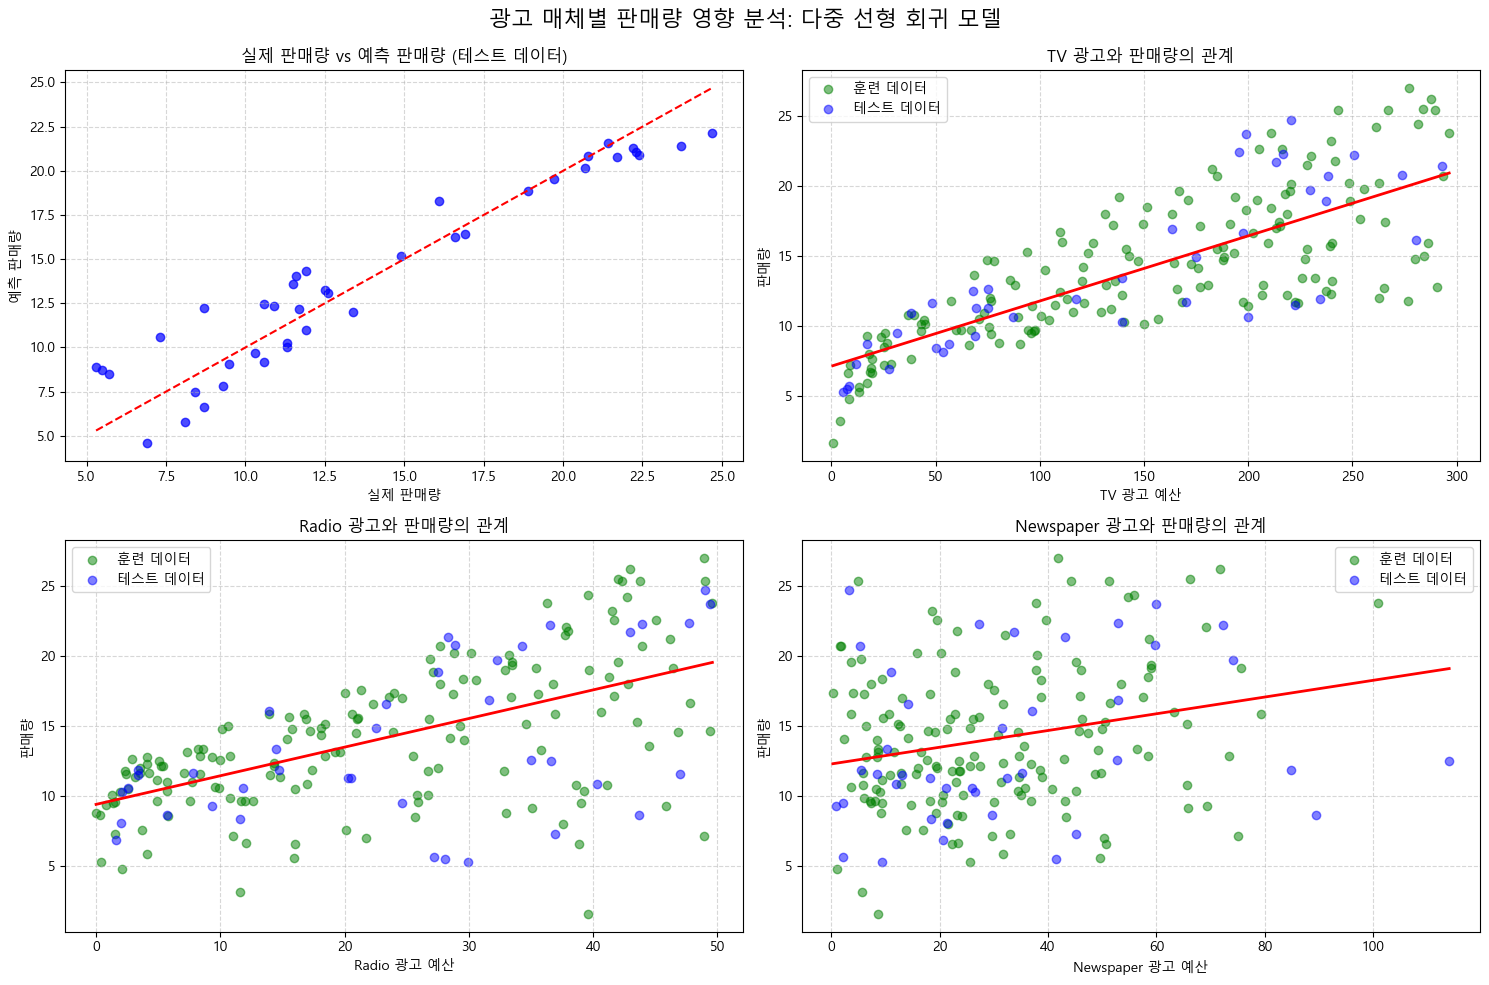

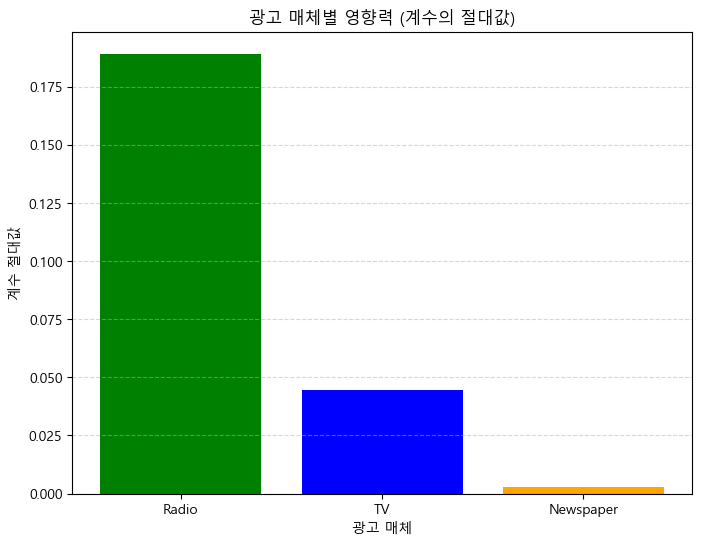

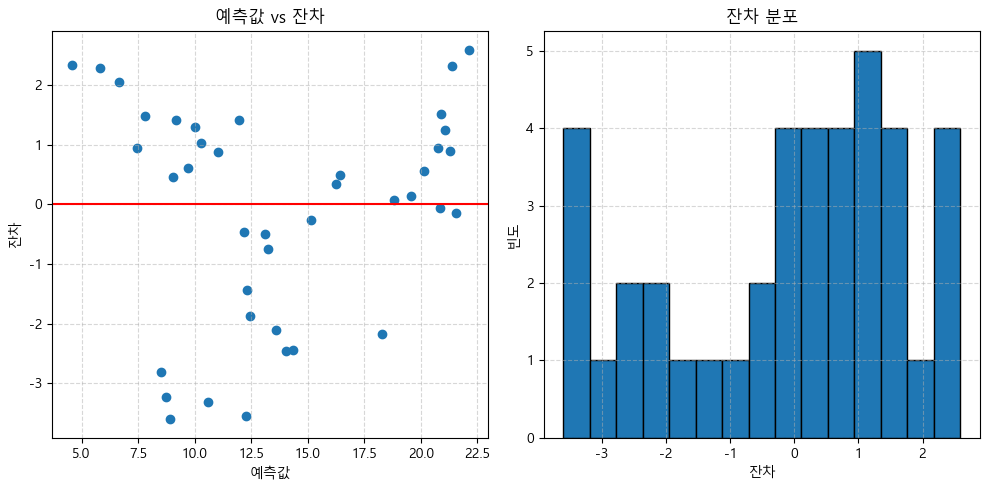

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

dataset = pd.read_csv('./dataset/Advertising.csv')

X = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

intercept = model.intercept_
coefficients = model.coef_

equation = f"Sales = {intercept:.4f} + {coefficients[0]:.4f}*TV + {coefficients[1]:.4f}*Radio + {coefficients[2]:.4f}*Newspaper"

new_data = np.array([
    [200, 50, 30],  # 새로운 광고 예산: TV=200, Radio=50, Newspaper=30
    [150, 30, 40],  # 다른 예산 조합
    [300, 70, 20]   # 또 다른 예산 조합
])

predictions = model.predict(new_data)
for i, pred in enumerate(predictions):
    print(f"예산 조합 {i+1} (TV={new_data[i][0]}, Radio={new_data[i][1]}, Newspaper={new_data[i][2]}) → 예측 판매량: {pred:.2f}")
    
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('실제 판매량 vs 예측 판매량 (테스트 데이터)')
plt.xlabel('실제 판매량')
plt.ylabel('예측 판매량')
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(2, 2, 2)
plt.scatter(X_train['TV'], y_train, color='green', alpha=0.5, label='훈련 데이터')
plt.scatter(X_test['TV'], y_test, color='blue', alpha=0.5, label='테스트 데이터')

tv_range = np.linspace(X['TV'].min(), X['TV'].max(), 100).reshape(-1, 1)
tv_model = LinearRegression().fit(X_train[['TV']], y_train)
tv_y_pred = tv_model.predict(tv_range)
plt.plot(tv_range, tv_y_pred, color='red', linewidth=2)


plt.title('TV 광고와 판매량의 관계')
plt.xlabel('TV 광고 예산')
plt.ylabel('판매량')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(2, 2, 3)
plt.scatter(X_train['Radio'], y_train, color='green', alpha=0.5, label='훈련 데이터')
plt.scatter(X_test['Radio'], y_test, color='blue', alpha=0.5, label='테스트 데이터')

radio_range = np.linspace(X['Radio'].min(), X['Radio'].max(), 100).reshape(-1, 1)
radio_model = LinearRegression().fit(X_train[['Radio']], y_train)
radio_y_pred = radio_model.predict(radio_range)
plt.plot(radio_range, radio_y_pred, color='red', linewidth=2)

plt.title('Radio 광고와 판매량의 관계')
plt.xlabel('Radio 광고 예산')
plt.ylabel('판매량')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(2, 2, 4)
plt.scatter(X_train['Newspaper'], y_train, color='green', alpha=0.5, label='훈련 데이터')
plt.scatter(X_test['Newspaper'], y_test, color='blue', alpha=0.5, label='테스트 데이터')

np_range = np.linspace(X['Newspaper'].min(), X['Newspaper'].max(), 100).reshape(-1, 1)
np_model = LinearRegression().fit(X_train[['Newspaper']], y_train)
np_y_pred = np_model.predict(np_range)
plt.plot(np_range, np_y_pred, color='red', linewidth=2)

plt.title('Newspaper 광고와 판매량의 관계')
plt.xlabel('Newspaper 광고 예산')
plt.ylabel('판매량')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.suptitle('광고 매체별 판매량 영향 분석: 다중 선형 회귀 모델', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

plt.figure(figsize=(8, 6))
feature_importance = pd.DataFrame({
    '특성': X.columns,
    '계수': np.abs(model.coef_)
})
feature_importance = feature_importance.sort_values('계수', ascending=False)

plt.bar(feature_importance['특성'], feature_importance['계수'], color=['green', 'blue', 'orange'])
plt.title('광고 매체별 영향력 (계수의 절대값)')
plt.xlabel('광고 매체')
plt.ylabel('계수 절대값')
plt.grid(True, linestyle='--', axis='y', alpha=0.5)
plt.show()

plt.figure(figsize=(10, 5))
residuals = y_test - y_test_pred
plt.subplot(1, 2, 1)
plt.scatter(y_test_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('예측값 vs 잔차')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=15, edgecolor='black')
plt.title('잔차 분포')
plt.xlabel('잔차')
plt.ylabel('빈도')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
## 로지스틱 회귀 추가학습 예제 ##

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('dataset/LogisticRegressionData.csv')
dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/LogisticRegressionData.csv'

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
classifier.predict([[6]])

array([1])

In [ ]:
# predict_proba : 각 클래스에 속할 확률(분류에 사용)
classifier.predict_proba([[6]])

array([[0.141483, 0.858517]])

In [ ]:
classifier.predict([[4]])

array([0])

In [ ]:
y_pred = classifier.predict([[4]])
y_pred

array([0])

In [ ]:
y_test

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0])

In [ ]:
X_test

array([[4.4, 3. , 1.3, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [4.9, 2.4, 3.3, 1. ],
       [5. , 2.3, 3.3, 1. ],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 3.3, 4.7, 1.6],
       [4.6, 3.6, 1. , 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [6.5, 3. , 5.2, 2. ],
       [5.4, 3. , 4.5, 1.5],
       [7.3, 2.9, 6.3, 1.8],
       [6.9, 3.1, 5.1, 2.3],
       [6.5, 3. , 5.8, 2.2],
       [6.4, 3.2, 4.5, 1.5],
       [5. , 3.4, 1.5, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [5.8, 4. , 1.2, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [6.1, 2.9, 4.7, 1.4],
       [6. , 3. , 4.8, 1.8],
       [5.4, 3.7, 1.5, 0.2],
       [6.7, 3.1, 5.6, 2.4],
       [6.6, 2.9, 4.6, 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 2.8, 5.6, 2.2],
       [6.7, 3. , 5. , 1.7],
       [6.6, 3. , 4.4, 1.4],
       [5.7, 3.8, 1.7, 0.3],
       [6.5, 3. , 5.5, 1.8],
       [5.2, 3.4, 1.4, 0.2]])

In [ ]:
# 정확도 반환
classifier.score(X_test, y_test)

ValueError: X has 4 features, but LogisticRegression is expecting 1 features as input.

In [ ]:
### KNN(K Nearest Neighbors) ###

#붓꽃(Iris) 품종 : Setosa, Versicolor, Virginica
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

#1. 데이터 준비
iris = load_iris()
X = iris.data # 특징(꽃잎, 꽃받침 길이/너비)
y = iris.target #품종 (0: Setosa, 1: Versicolor, 2: Virginica)
feature_names = iris.feature_names # 특징 이름 가져오기
target_names = iris.target_names

#Pandas DaFrame 생성 및 출력
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y # 품종 레이블 추가
df['target_name'] = df['target'].apply(lambda x: target_names[x]) # 품종 이름 추가

print("Iris Data (Head 5):")
print(df.head())
print("\n")


Iris Data (Head 5):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  




In [ ]:
#2. 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# test_size=0.3: 테스트 데이터 30%, 훈련 데이터 70%로 분리
# random_state=42: 재현성을 위해 난수 시드 고정

#3. KNN 모델 생성 및  학습
k = 5 # 값 설정(이웃의 수)
knn = KNeighborsClassifier(n_neighbors=k) # 모델 생성
knn.fit(X_train, y_train) # 훈련 데이터로 모델 학습

KNeighborsClassifier()

In [ ]:
# 4. 테스트 데이터로 예측
y_pred = knn.predict(X_test) # 테스트 데이터에 대한 예측 수행

# 5. 모델 평가
accuracy = accuracy_score(y_test, y_pred) # 정확도계산
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [ ]:
# 6. 새로운 데이터에 대한 예측 (선택 사항)
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])
prediction = knn.predict(new_data)
print(f"New data prediction: {iris.target_names[prediction[0]]}") # 예측 결과 출력

New data prediction: setosa


In [ ]:
### 의사결정나무 - Decision Tree ###

# 붓꽃 (Iris) 품종 : SEtosa, Versicolor, Viginica
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [ ]:
# Pandas DataFrame 생성
df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y
df['target_name'] = [target_names[i] for i in y]    # target 이름 추가

# 데이터프레임 출력 (처음 5행)
print("DataFrame Sample")
print(df.head())
# print9df.tail()

DataFrame Sample
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  


In [ ]:
# 데이터 분할 (훈련세트 80%, 테스트 세트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 의사결정 트리 모델 생성 (모델 파라미터 튜닝 가능)
df =  DecisionTreeClassifier(max_depth=3, random_state=42)    # max_depth 조절

# 모델 학습
df.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# 테스트 데이터로 예측
y_pred = df.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


In [ ]:
# 분류 보고서
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



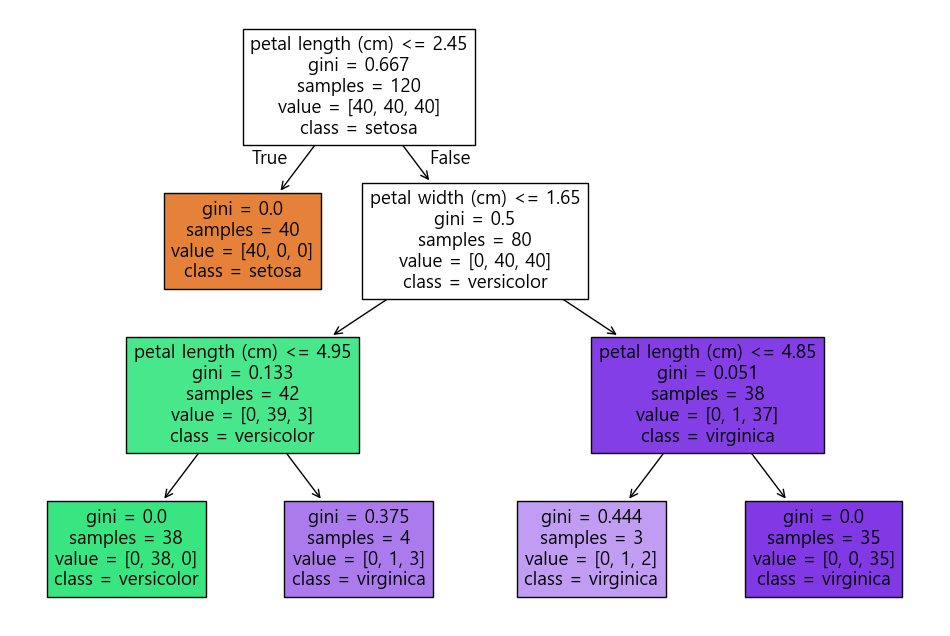

In [ ]:
# 의사결정 트리 시각화
plt.figure(figsize=(12, 8))
plot_tree(df, feature_names=feature_names, class_names=target_names, filled=True)
plt.show()